In [2]:
#1
#Mathematical formula for SVM is wtx+b=0

## 

In [ ]:
#2
Objective fn is to maximize the cost function 2/magnitude of w.

In [ ]:
#3
Kernel trick in svm is used to improve the accuracy of the model.It is a mathematical formula usd to classify the data points.

In [ ]:
#4
Support vectors are the variable points of the dataset that lie closer to the best fit line,through which we draw the marginal line
and therefore classify the datapoints.

In [ ]:
#5
Hard margin:When all points are classified correctly.
Soft margin:When some points are misclassified.
Marginal Plane:It is used to classify the data points into two categories.

In [3]:
#6
import pandas as pd
df=pd.read_csv('iris.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
X=df.iloc[:,:-1]
y=df['species']

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=45)

In [7]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [8]:
y_pred=svc.predict(x_test)
print(y_pred)

['setosa' 'setosa' 'virginica' 'setosa' 'setosa' 'setosa' 'setosa'
 'virginica' 'virginica' 'virginica' 'setosa' 'virginica' 'virginica'
 'virginica' 'virginica' 'setosa' 'virginica' 'virginica' 'setosa'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'virginica' 'virginica' 'setosa' 'virginica' 'setosa'
 'setosa' 'versicolor' 'setosa' 'setosa' 'versicolor' 'setosa'
 'versicolor' 'versicolor']


In [14]:
from sklearn.metrics import accuracy_score,classification_report

In [15]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

1.0


In [16]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [28]:
xx = xx.astype(np.float64)
yy = yy.astype(np.float64)


In [29]:
grid_points = np.c_[xx.ravel(), yy.ravel()]
print(grid_points.dtype)  # Ensure this is float64


float64


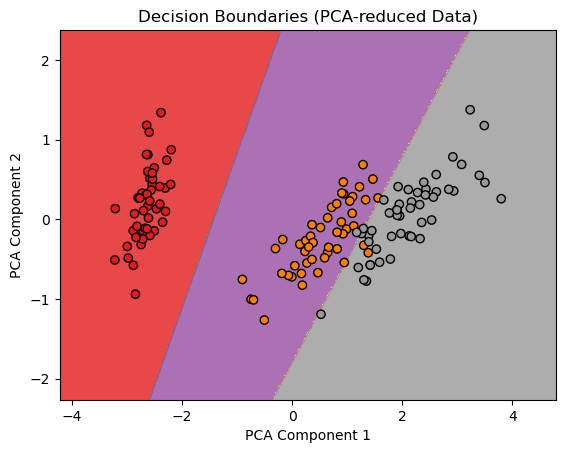

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # All four features
y = iris.target

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Train an SVC model on the original dataset with all 4 features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svc = SVC(kernel='linear', C=1.0)
svc.fit(X_train, y_train)

# Define a grid for plotting decision boundaries
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Flatten the grid and transform it back to the original 4D feature space
grid_points = np.c_[xx.ravel(), yy.ravel()]
original_space_points = pca.inverse_transform(grid_points)

# Predict over the grid using the trained SVC
Z = svc.predict(original_space_points)
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Set1)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Decision Boundaries (PCA-reduced Data)")
plt.show()
